In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
categorical_list=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]

In [7]:
numeric_list=["age", "creatinine_phosphokinase",
           "ejection_fraction", "platelets",
           "serum_creatinine", "serum_sodium", "time","DEATH_EVENT"]
       

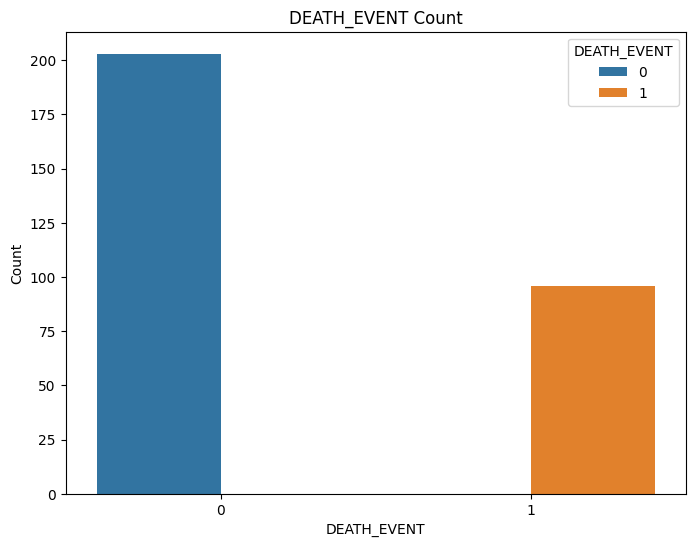

In [8]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='DEATH_EVENT', hue='DEATH_EVENT')
plt.title('DEATH_EVENT Count')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.show()

In [9]:
import pandas as pd
from sklearn.utils import resample

# Counting the occurrences of each class
class_counts = data['DEATH_EVENT'].value_counts()

# Identifing the minority and majority classes
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()


# Separating the data into minority and majority class samples
minority_samples = data[data['DEATH_EVENT'] == 1]
majority_samples = data[data['DEATH_EVENT'] == 0]

# Upsampling the minority class
minority_upsampled = resample(minority_samples,
                              replace=True,  
                              n_samples=class_counts[majority_class], 
                              random_state=42)

# Combining the upsampled minority class with the majority class
df_upsampled = pd.concat([majority_samples, minority_upsampled])

# Shuffling the upsampled dataframe
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Checking the class distribution after upsampling
df_upsampled['DEATH_EVENT'].value_counts()

0    203
1    203
Name: DEATH_EVENT, dtype: int64

## DEATH_EVENT

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_upsampled, x='DEATH_EVENT', hue='DEATH_EVENT')
plt.title('DEATH_EVENT Count')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.show()

## Age

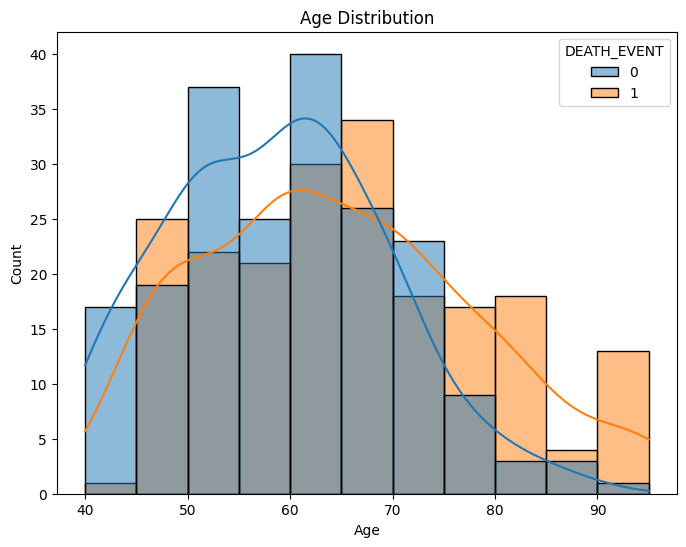

In [13]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_upsampled, x='age', hue='DEATH_EVENT', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Anaemia

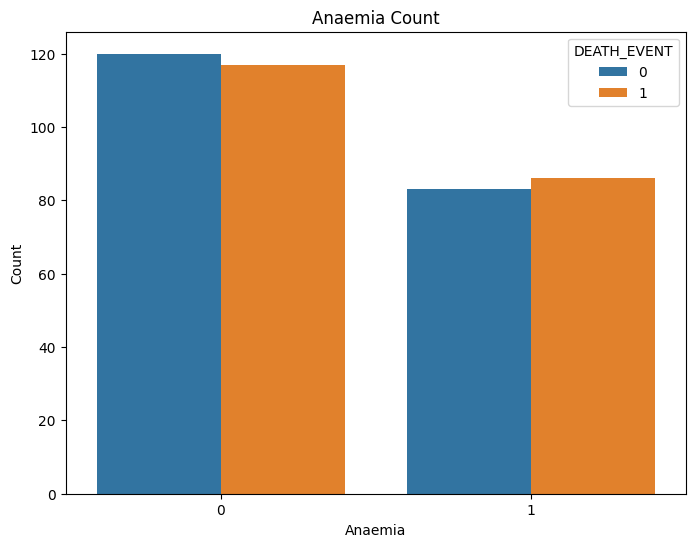

In [14]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_upsampled, x='anaemia', hue='DEATH_EVENT')
plt.title('Anaemia Count')
plt.xlabel('Anaemia')
plt.ylabel('Count')
plt.show()

## Creatinine Phosphokinase

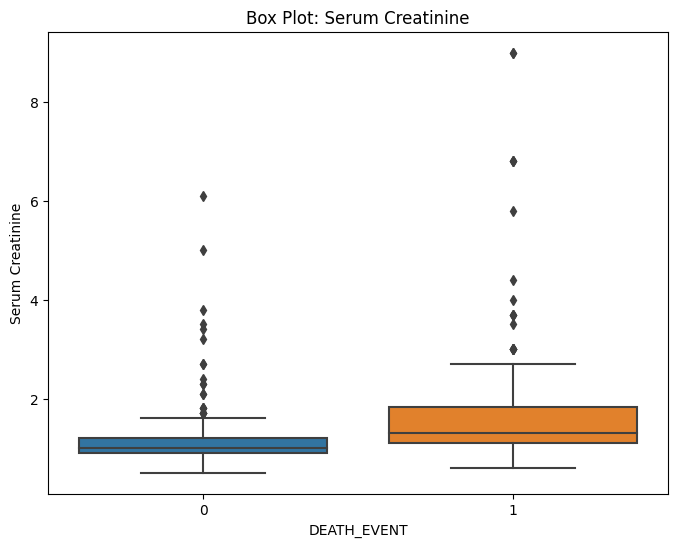

In [15]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_upsampled, y='serum_creatinine', x='DEATH_EVENT')
plt.title('Box Plot: Serum Creatinine')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Serum Creatinine')
plt.show()

## Diabetes

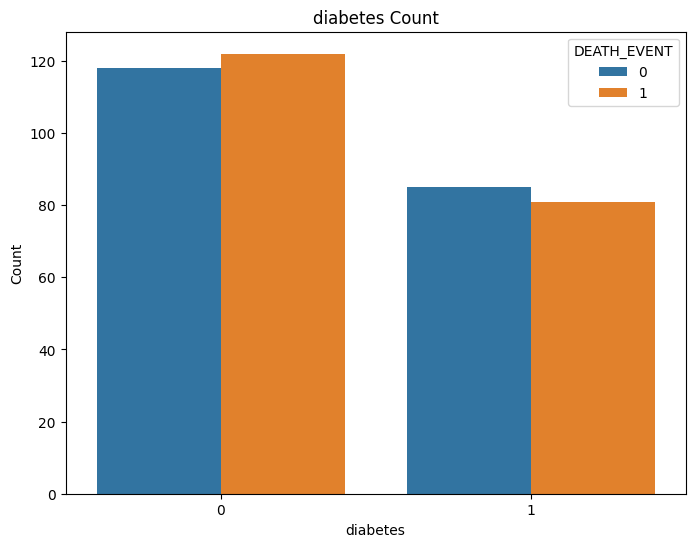

In [16]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_upsampled, x='diabetes', hue='DEATH_EVENT')
plt.title('diabetes Count')
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.show()

## Ejection Fraction

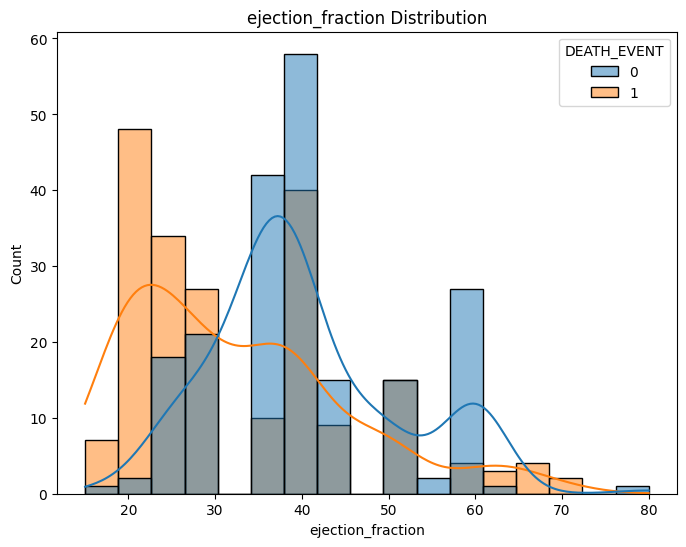

In [17]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_upsampled, x='ejection_fraction', hue='DEATH_EVENT', kde=True)
plt.title('ejection_fraction Distribution')
plt.xlabel('ejection_fraction')
plt.ylabel('Count')
plt.show()

## High Blood Pressure

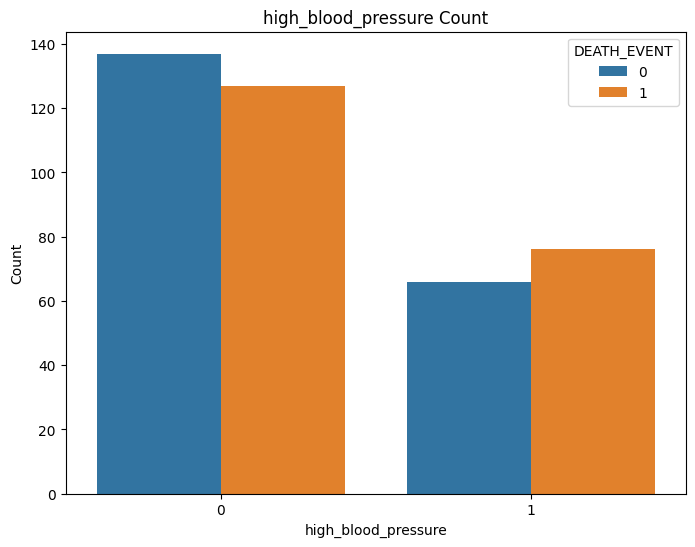

In [18]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_upsampled, x='high_blood_pressure', hue='DEATH_EVENT')
plt.title('high_blood_pressure Count')
plt.xlabel('high_blood_pressure')
plt.ylabel('Count')
plt.show()

## Platelets

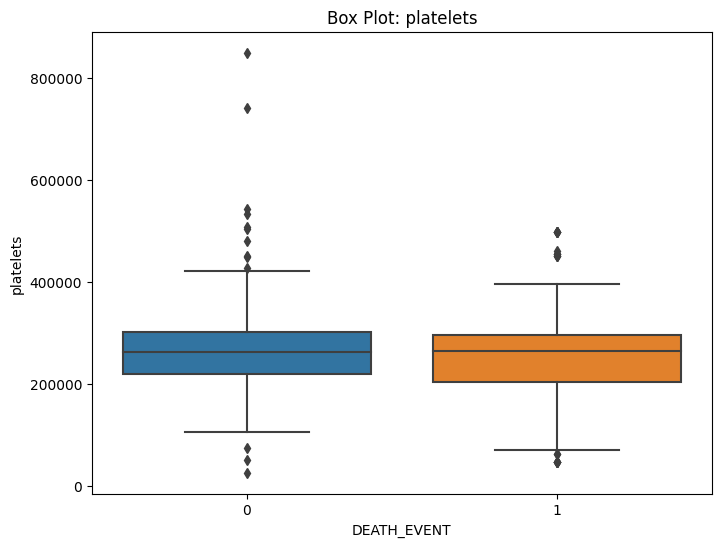

In [19]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_upsampled, y='platelets', x='DEATH_EVENT')
plt.title('Box Plot: platelets')
plt.xlabel('DEATH_EVENT')
plt.ylabel('platelets')
plt.show()

## Serum Sodium

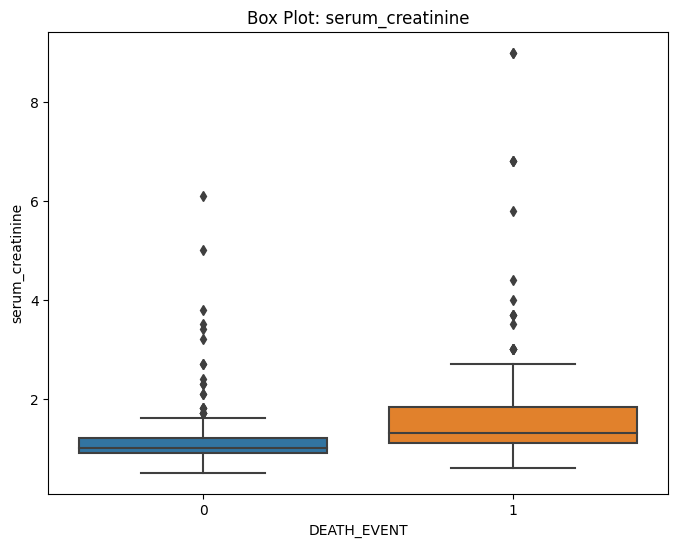

In [20]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_upsampled, y='serum_creatinine', x='DEATH_EVENT')
plt.title('Box Plot: serum_creatinine')
plt.xlabel('DEATH_EVENT')
plt.ylabel('serum_creatinine')
plt.show()

## Sex

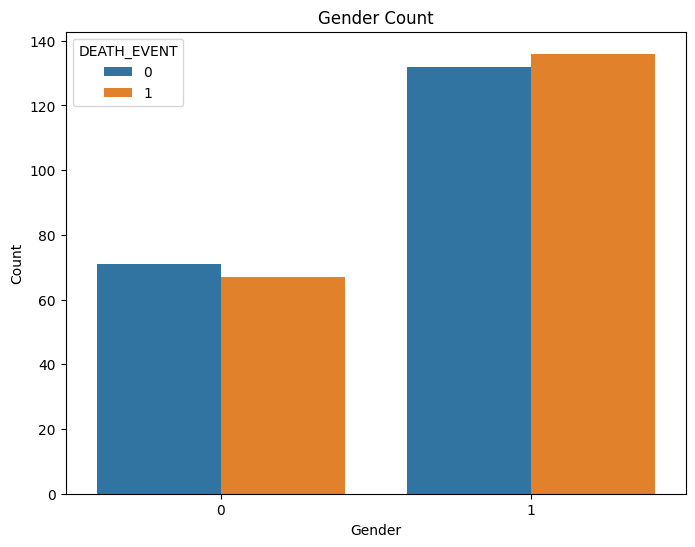

In [21]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_upsampled, x='sex', hue='DEATH_EVENT')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Smoking

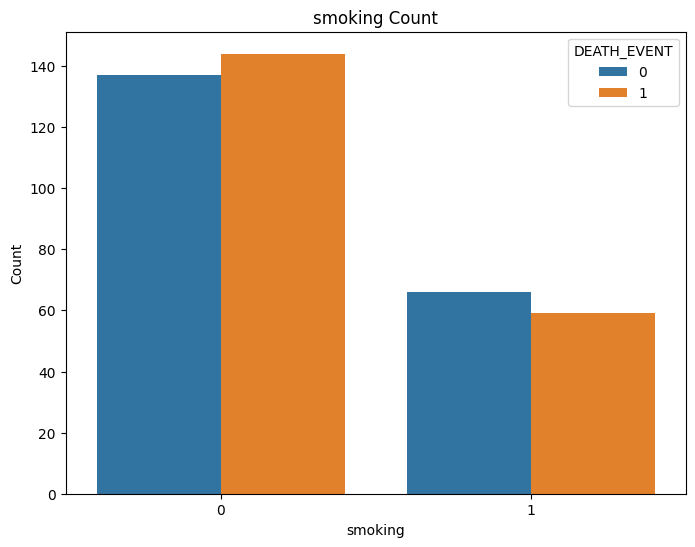

In [22]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_upsampled, x='smoking', hue='DEATH_EVENT')
plt.title('smoking Count')
plt.xlabel('smoking')
plt.ylabel('Count')
plt.show()

## Time

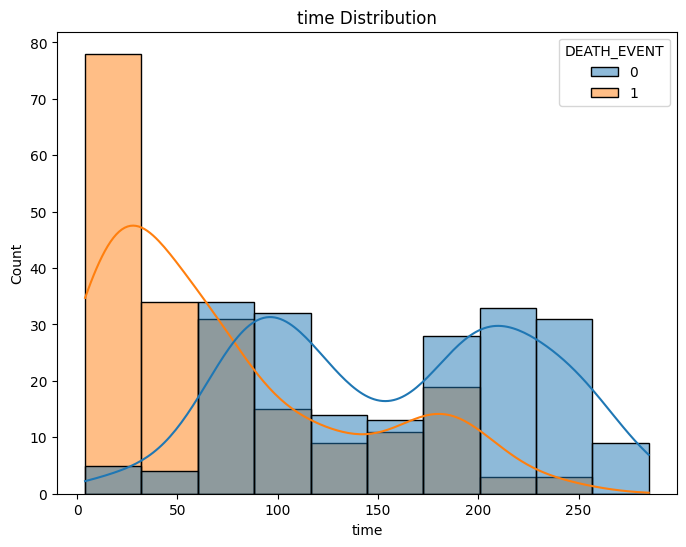

In [23]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_upsampled, x='time', hue='DEATH_EVENT', kde=True)
plt.title('time Distribution')
plt.xlabel('time')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [24]:
df_upsampled.age.unique()

array([61.   , 55.   , 48.   , 63.   , 45.   , 50.   , 72.   , 80.   ,
       60.   , 85.   , 65.   , 82.   , 77.   , 53.   , 70.   , 42.   ,
       58.   , 49.   , 66.   , 75.   , 57.   , 94.   , 59.   , 60.667,
       69.   , 40.   , 64.   , 52.   , 68.   , 51.   , 86.   , 67.   ,
       47.   , 62.   , 90.   , 95.   , 79.   , 46.   , 73.   , 41.   ,
       78.   , 44.   , 54.   , 56.   , 81.   , 43.   ])

In [25]:
df_upsampled['age'] = df_upsampled['age'].astype('int64')

In [26]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


columns_to_scale = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'time']

scaler = MinMaxScaler()

df_upsampled[columns_to_scale] = scaler.fit_transform(df_upsampled[columns_to_scale])

df_upsampled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,61,1,0.007783,0,0.384615,1,0.247181,0.9,0.800000,0,0,0.377224,0
1,55,0,1.000000,0,0.353846,0,0.288833,1.1,0.657143,1,0,0.007117,1
2,48,1,0.013779,1,0.230769,1,0.265365,1.6,0.485714,0,0,0.672598,1
3,63,1,0.004848,1,0.384615,0,0.237483,1.1,0.771429,0,0,0.291815,0
4,45,0,0.034320,1,0.307692,0,1.000000,1.3,0.828571,1,1,0.298932,0


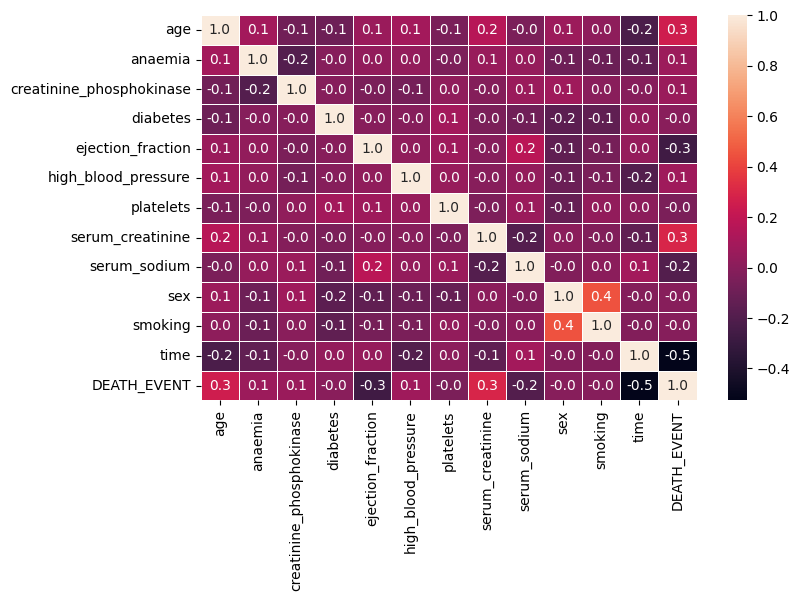

In [27]:
f,ax=plt.subplots(figsize = (8,5))
sns.heatmap(data.corr(), annot = True, fmt = ".1f", linewidths = .5,ax=ax)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [29]:
X = df_upsampled.drop('DEATH_EVENT', axis=1)
y = df_upsampled['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=24)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((324, 12), (82, 12), (324,), (82,))

In [31]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [32]:
# Define the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Define hyperparameters to tune
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1.0, 3.0]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

best_params = grid_search.best_params_
print("The best model parameters are : \n",best_params)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
logreg_accuracy, logreg_precision, logreg_recall, logreg_f1 = evaluate_model(y_test, y_pred)

# Print the evaluation metrics
print('Logistic Regression:')
print(f'Accuracy: {logreg_accuracy:.4f}')
print(f'Precision: {logreg_precision:.4f}')
print(f'Recall: {logreg_recall:.4f}')
print(f'F1-Score: {logreg_f1:.4f}')

The best model parameters are : 
 {'C': 1.0}
Logistic Regression:
Accuracy: 0.8902
Precision: 0.8810
Recall: 0.9024
F1-Score: 0.8916


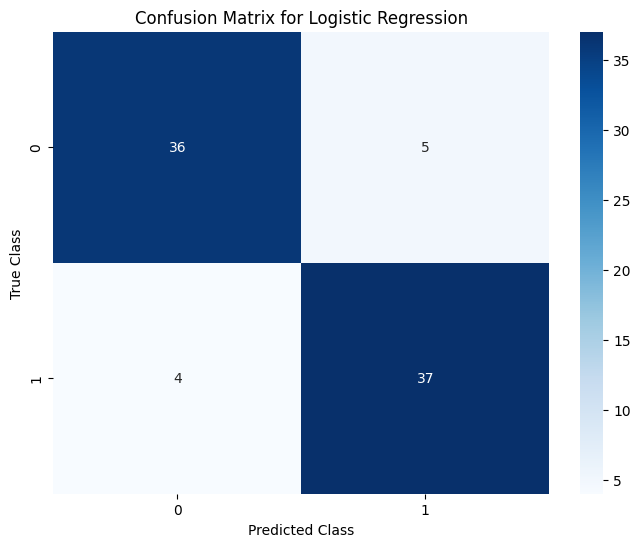

In [33]:
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## KNN

In [34]:
knn = KNeighborsClassifier()

# Define hyperparameters to tune
hyperparameters = {
    'n_neighbors': [3, 5, 7, 9]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

best_params = grid_search.best_params_
print("The best model parameters are : \n",best_params)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_model(y_test, y_pred)

# Print the evaluation metrics
print('K-Nearest Neighbors (KNN):')
print(f'Accuracy: {knn_accuracy:.4f}')
print(f'Precision: {knn_precision:.4f}')
print(f'Recall: {knn_recall:.4f}')
print(f'F1-Score: {knn_f1:.4f}')

The best model parameters are : 
 {'n_neighbors': 3}
K-Nearest Neighbors (KNN):
Accuracy: 0.7805
Precision: 0.7674
Recall: 0.8049
F1-Score: 0.7857


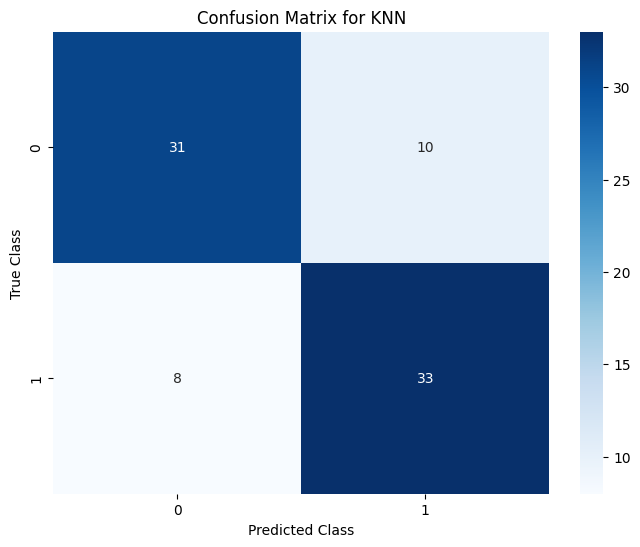

In [35]:
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Naive Bayes

In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(y_test, y_pred)

print('Naive Bayes:')
print(f'Accuracy: {nb_accuracy:.4f}')
print(f'Precision: {nb_precision:.4f}')
print(f'Recall: {nb_recall:.4f}')
print(f'F1-Score: {nb_f1:.4f}')

Naive Bayes:
Accuracy: 0.7805
Precision: 0.8966
Recall: 0.6341
F1-Score: 0.7429


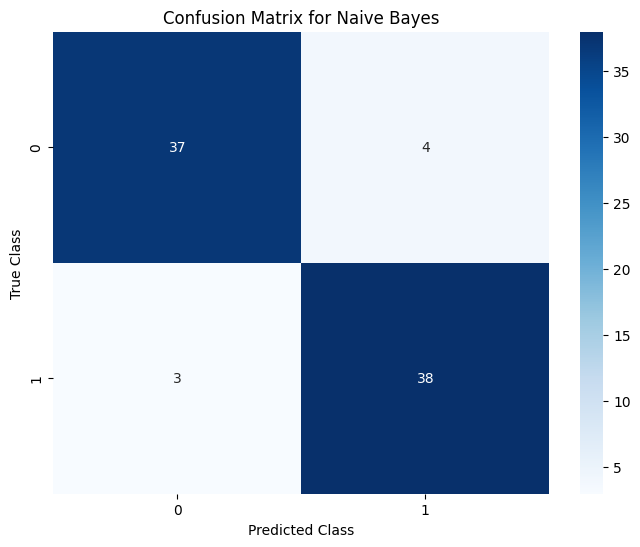

In [42]:
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## GBDT

In [43]:
# Define the Gradient Boosting model
gbdt = GradientBoostingClassifier()

# Define hyperparameters to tune
hyperparameters = {
    'n_estimators': [50, 100, 150, 200, 300, 500],
    'max_depth': [3, 5, 7]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gbdt, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

gbdt_accuracy, gbdt_precision, gbdt_recall, gbdt_f1 = evaluate_model(y_test, y_pred)

print('GBDT:')
print(f'Accuracy: {gbdt_accuracy:.4f}')
print(f'Precision: {gbdt_precision:.4f}')
print(f'Recall: {gbdt_recall:.4f}')
print(f'F1-Score: {gbdt_f1:.4f}')

GBDT:
Accuracy: 0.9146
Precision: 0.8864
Recall: 0.9512
F1-Score: 0.9176


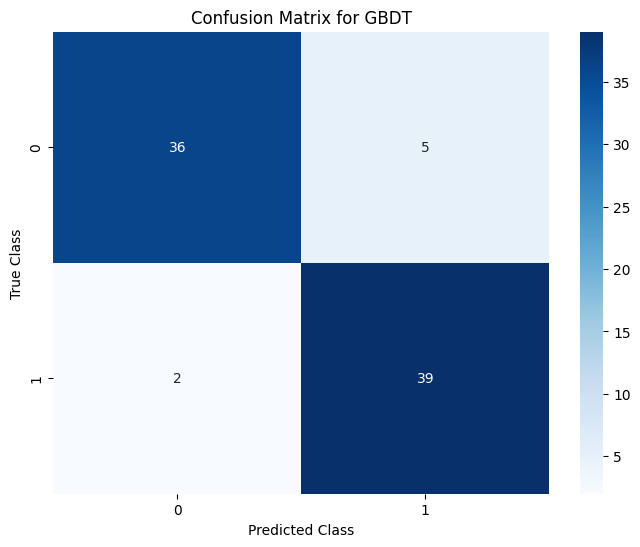

In [44]:
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix for GBDT")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()